# Telecom Churn Case Study:

##### 1. Data Cleaning & Preparation:
    - import libraries and read the data
    - handle categorical and numerical variables by creating dummies
    - handle missing values by imputing them with most relevant values or removing data all-together if nulls exceed a limit
    - create new features if needed here (else do them later)
##### 2. Define High value customers
    - identify these guys based on recharge amount
    - filter out these customers (about 29.9k)
    - now tag the churners based on zero calls AND data usage
    - remove all 9-month-related attributes from this dataset
##### 3. Model building:
    - Begin modelling
    - Use PCA to reduce features
    - Run a Logistic Regression on the features and check some evaluation metrics (Precision and AUC)
    - Run a Random Forest algo and check the same evaluation metrics (Precision and AUC)
    - Compare both models and decide which one to use to identify churn-related features
##### 4. Based on previous comparison, build a Random Forest model on the data:
    - Tweak Hyperparameters
    - check precision and AUC
##### 5. Prediction on the test data set
    - run the model on test data and record metrics
    - extract best features for prediction
##### 6. Advice ideal retention strategy:
    - Identify key retension strategies for the customers and explain with details

### 1. Data Cleaning & Preparation:

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# let's read the data
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# looking at the overall shape
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# look at data statistics
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
# let's create a backup of data
df_copy = df.copy()

In [8]:
# Looking for missing values in the data

pct_nul = df.isnull().sum()/ df.shape[0]

pct_nul = pd.DataFrame(pct_nul)

print(round(100*(pct_nul.head(50)),2))

print(round(100*(pct_nul.tail(50)),2))

                         0
mobile_number         0.00
circle_id             0.00
loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
last_date_of_month_6  0.00
last_date_of_month_7  0.60
last_date_of_month_8  1.10
last_date_of_month_9  1.66
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
l

In [9]:
# extracting the data and % of null for closer inspection
pct_nul.to_csv("pct_nul1.csv")

In [10]:
# filtering for columns having more than 70% null values
nul_col = df[df.columns[df.isnull().sum()/ df.shape[0] > .7]]

In [11]:
print(nul_col)

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
1                          NaN                7/25/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                     6/4/2014                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                6/13/2014                      NaN   
99997                6/17/2014                7/19/2014   
99998                6/11/2014                      NaN   

      date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  \
0                     8/8/2014                      NaN                1.0   
1                    8/10/2014                      NaN                NaN   
2                          NaN                9/17/2014  

As you can see there are many columns with varying percentages of null values. Some columns even have about 74% of null values. We will first look into this data before deciding what to do...

#### Observations: 
1. There are columns like mobile number,circle_id and last_date_of_month that we dont need as they have a constant value and those columns don't capture any variation in data. Hence, we could consider dropping these columns.
2. Some columns containing recharge related information seem to have blank values to indicate that no recharge was made by the user. We will replace these blank values with zero.
3. At the same time, there are similar columns like 'count_rech_2g_6','count_rech_2g_7' etc that also have 74% missing value. This could mean that the user only recharged for talktime, and not for any data pack. In a way this can be seen by looking at the last_date_of_recharge. When both columns are empty, it is evident our supposition is correct. So, we can delete these columns too.
3. There are some other columns like 'night_pack_user' & 'fb_user' where the data is in a binary (1/0) format. This seems to suggest that the user either uses facebook/night_pack or they dont. We will consider removing these columns alltogether as it will be difficult for us to impute any proper missing values. Mainly due to the fact that these columns have around 74% missing values.

In [12]:
useless_cols =  ['mobile_number', 'circle_id', 
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
             'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
             'count_rech_3g_6',
             'count_rech_2g_6',
             'count_rech_3g_7',
             'count_rech_2g_7',
             'count_rech_3g_9',
             'count_rech_2g_9',
             'arpu_3g_6',
             'arpu_2g_6',                 
             'arpu_3g_7',
             'arpu_2g_7',
             'arpu_3g_8',
             'arpu_2g_8',                 
             'arpu_3g_9',
             'arpu_2g_9',
             'count_rech_3g_8',
             'count_rech_2g_8']

In [13]:
df = df.drop(useless_cols, axis=1)

In [14]:
# we've removed 38 columns of data
df.shape

(99999, 185)

#### Treating missing values

#### i) Imputing with zeroes

In [15]:
# create a list of recharge columns where we will impute missing values with zeros 

rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [16]:
# impute missing values with 0
df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))

In [17]:
# Checking if there are any more null values
print(df[rech_cols].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [18]:
df.describe(include = 'all')

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [19]:
# exporting null value details to csv to check again
pct_nul2 = df.isnull().sum()/ df.shape[0]

pct_nul2 = pd.DataFrame(pct_nul2)

pct_nul2.to_csv("pct_nul2.csv")

In [20]:
print(round(100*(pct_nul2.head(60)),2))

                     0
arpu_6            0.00
arpu_7            0.00
arpu_8            0.00
arpu_9            0.00
onnet_mou_6       3.94
onnet_mou_7       3.86
onnet_mou_8       5.38
onnet_mou_9       7.75
offnet_mou_6      3.94
offnet_mou_7      3.86
offnet_mou_8      5.38
offnet_mou_9      7.75
roam_ic_mou_6     3.94
roam_ic_mou_7     3.86
roam_ic_mou_8     5.38
roam_ic_mou_9     7.75
roam_og_mou_6     3.94
roam_og_mou_7     3.86
roam_og_mou_8     5.38
roam_og_mou_9     7.75
loc_og_t2t_mou_6  3.94
loc_og_t2t_mou_7  3.86
loc_og_t2t_mou_8  5.38
loc_og_t2t_mou_9  7.75
loc_og_t2m_mou_6  3.94
loc_og_t2m_mou_7  3.86
loc_og_t2m_mou_8  5.38
loc_og_t2m_mou_9  7.75
loc_og_t2f_mou_6  3.94
loc_og_t2f_mou_7  3.86
loc_og_t2f_mou_8  5.38
loc_og_t2f_mou_9  7.75
loc_og_t2c_mou_6  3.94
loc_og_t2c_mou_7  3.86
loc_og_t2c_mou_8  5.38
loc_og_t2c_mou_9  7.75
loc_og_mou_6      3.94
loc_og_mou_7      3.86
loc_og_mou_8      5.38
loc_og_mou_9      7.75
std_og_t2t_mou_6  3.94
std_og_t2t_mou_7  3.86
std_og_t2t_

#### Observations:

- Looking at the data, we see that many columns belonging to the 9th month, like 'onnet_mou_9','offnet_mou_9','roam_ic_mou_9' etc. are missing about 8% of the data. Now this could be because those users have already churned and are no longer online. Hence, it would be safer to impute those missing values with zero.
- Some columns like 'arpu_6', 'arpu_7' also have negative values. If the average revenue per user is negative, this may indicate the arrears accrued by customers who have not paid their bill (mostly post paid customers). So doing a median treatment here might be ok. 
- For the remaining month's data, we will impute with the median value as we could avoid any variations in the data caused by outliers

In [21]:
# making a list of 9th month columns

nine_mon_cols = ['onnet_mou_9',
'offnet_mou_9',
'roam_ic_mou_9',
'roam_og_mou_9',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_9',
'loc_og_mou_9',
'std_og_t2t_mou_9',
'std_og_t2m_mou_9',
'std_og_t2f_mou_9',
'std_og_t2c_mou_9',
'std_og_mou_9',
'isd_og_mou_9',
'spl_og_mou_9',
'og_others_9',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_9',
'loc_ic_mou_9',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_9',
'std_ic_t2o_mou_9',
'std_ic_mou_9',
'spl_ic_mou_9',
'isd_ic_mou_9',
'ic_others_9']
                 
# and another list of remaining columns
remaining_cols = ['onnet_mou_8',
'offnet_mou_8',
'roam_ic_mou_8',
'roam_og_mou_8',
'loc_og_t2t_mou_8',
'loc_og_t2m_mou_8',
'loc_og_t2f_mou_8',
'loc_og_t2c_mou_8',
'loc_og_mou_8',
'std_og_t2t_mou_8',
'std_og_t2m_mou_8',
'std_og_t2f_mou_8',
'std_og_t2c_mou_8',
'std_og_mou_8',
'isd_og_mou_8',
'spl_og_mou_8',
'og_others_8',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_8',
'loc_ic_mou_8',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_8',
'std_ic_t2o_mou_8',
'std_ic_mou_8',
'spl_ic_mou_8',
'isd_ic_mou_8',
'ic_others_8',
'onnet_mou_6',
'offnet_mou_6',
'roam_ic_mou_6',
'roam_og_mou_6',
'loc_og_t2t_mou_6',
'loc_og_t2m_mou_6',
'loc_og_t2f_mou_6',
'loc_og_t2c_mou_6',
'loc_og_mou_6',
'std_og_t2t_mou_6',
'std_og_t2m_mou_6',
'std_og_t2f_mou_6',
'std_og_t2c_mou_6',
'std_og_mou_6',
'isd_og_mou_6',
'spl_og_mou_6',
'og_others_6',
'loc_ic_t2t_mou_6',
'loc_ic_t2m_mou_6',
'loc_ic_t2f_mou_6',
'loc_ic_mou_6',
'std_ic_t2t_mou_6',
'std_ic_t2m_mou_6',
'std_ic_t2f_mou_6',
'std_ic_t2o_mou_6',
'std_ic_mou_6',
'spl_ic_mou_6',
'isd_ic_mou_6',
'ic_others_6',
'onnet_mou_7',
'offnet_mou_7',
'roam_ic_mou_7',
'roam_og_mou_7',
'loc_og_t2t_mou_7',
'loc_og_t2m_mou_7',
'loc_og_t2f_mou_7',
'loc_og_t2c_mou_7',
'loc_og_mou_7',
'std_og_t2t_mou_7',
'std_og_t2m_mou_7',
'std_og_t2f_mou_7',
'std_og_t2c_mou_7',
'std_og_mou_7',
'isd_og_mou_7',
'spl_og_mou_7',
'og_others_7',
'loc_ic_t2t_mou_7',
'loc_ic_t2m_mou_7',
'loc_ic_t2f_mou_7',
'loc_ic_mou_7',
'std_ic_t2t_mou_7',
'std_ic_t2m_mou_7',
'std_ic_t2f_mou_7',
'std_ic_t2o_mou_7',
'std_ic_mou_7',
'spl_ic_mou_7',
'isd_ic_mou_7',
'ic_others_7']

In [22]:
# impute missing values from 9th month columns with 0
df[nine_mon_cols] = df[nine_mon_cols].apply(lambda x: x.fillna(0))

In [23]:
# imputing the remaining missing values with the median
df[remaining_cols] = df[remaining_cols].fillna((df[remaining_cols].median()))

In [24]:
# looks like there are no more missing values
print(df[nine_mon_cols].isnull().sum()*100/df.shape[1])

onnet_mou_9         0.0
offnet_mou_9        0.0
roam_ic_mou_9       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_9    0.0
loc_og_t2f_mou_9    0.0
loc_og_t2c_mou_9    0.0
loc_og_mou_9        0.0
std_og_t2t_mou_9    0.0
std_og_t2m_mou_9    0.0
std_og_t2f_mou_9    0.0
std_og_t2c_mou_9    0.0
std_og_mou_9        0.0
isd_og_mou_9        0.0
spl_og_mou_9        0.0
og_others_9         0.0
loc_ic_t2t_mou_9    0.0
loc_ic_t2m_mou_9    0.0
loc_ic_t2f_mou_9    0.0
loc_ic_mou_9        0.0
std_ic_t2t_mou_9    0.0
std_ic_t2m_mou_9    0.0
std_ic_t2f_mou_9    0.0
std_ic_t2o_mou_9    0.0
std_ic_mou_9        0.0
spl_ic_mou_9        0.0
isd_ic_mou_9        0.0
ic_others_9         0.0
dtype: float64


In [25]:
print(df[remaining_cols].isnull().sum()*100/df.shape[1])

onnet_mou_8         0.0
offnet_mou_8        0.0
roam_ic_mou_8       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_8    0.0
                   ... 
std_ic_t2o_mou_7    0.0
std_ic_mou_7        0.0
spl_ic_mou_7        0.0
isd_ic_mou_7        0.0
ic_others_7         0.0
Length: 87, dtype: float64


#### Creating new features - inlcuding deriving the high value customer info

- now that we have cleaned up the data, we could create new features to get an idea of some basic trends

In [26]:
# calculating the time (in years) a customer has spent with the provider
df['yr_on_network'] = round((df['aon']/365),0)

Text(0.5, 0, 'Years')

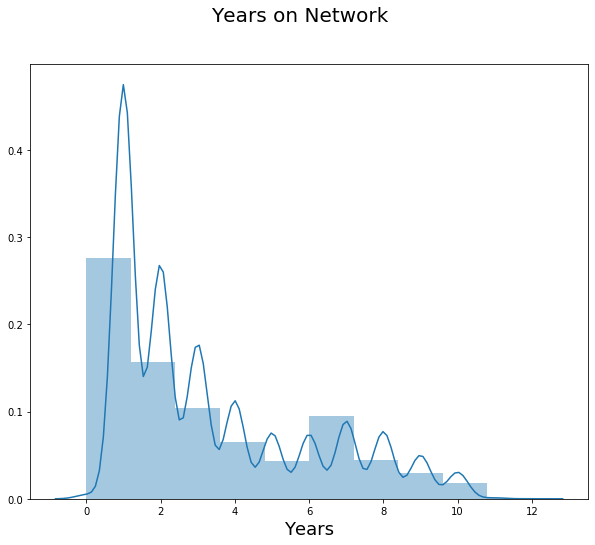

In [27]:
# let's just visualise how long users normally stay on the network
# looks like most users stay only for about 1-2 years and then move on

fig = plt.figure(figsize=(10,8))
sns.distplot((df.yr_on_network), bins = 10)
fig.suptitle('Years on Network', fontsize = 20)
plt.xlabel('Years', fontsize = 18)

In [28]:
# Total minutes of on-network and off-network usage in months 6 & 7
df['total_onnet_mou_6and7'] = df['onnet_mou_6'] + df['onnet_mou_7'] 

df['total_offnet_mou_6and7'] = df['offnet_mou_6'] + df['offnet_mou_7']

In [29]:
# checking percentage of on-network usage
# the idea is if a person is dialing more off-network numbers, it might be an indicator of churn

df['pct_onnet_usage'] = round( 100*(df['total_onnet_mou_6and7'] / (df['total_onnet_mou_6and7'] + df['total_offnet_mou_6and7'])),2)

In [30]:
# now we'll calculate the total data recharged in months 6 & 7
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [31]:
# here we will calculate total recharge amount (talktime plus data)
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [32]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sep_vbc_3g,yr_on_network,total_onnet_mou_6and7,total_offnet_mou_6and7,pct_onnet_usage,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,0.00,96.31,91.735,...,3.58,3.0,66.64,188.045,26.17,252.0,252.0,614.0,504.0,559.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,...,0.00,3.0,102.79,115.580,47.07,0.0,154.0,74.0,538.0,306.0
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,...,0.00,3.0,66.78,363.920,15.50,0.0,0.0,168.0,315.0,241.5
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,...,0.00,7.0,154.30,232.320,39.91,0.0,0.0,230.0,310.0,270.0
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.880,...,0.00,4.0,199.75,168.840,54.19,56.0,0.0,252.0,350.0,301.0


In [33]:
# let's find the 70th percentile for the average amount of recharge done in months 6 & 7 (it is Rs. 478)
print(df.av_amt_data_6_7.quantile(0.7))

478.0


### 2. Define High value customers

In [34]:
# based on the above information, we'll extract only the high value customers for further analysis

df1 = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df1 = df1.reset_index(drop=True)

In [35]:
# let's see how much data was extracted
df1.shape

(30001, 194)

In [36]:
# deleting original columns
df1 = df1.drop(['aon','onnet_mou_6', 'onnet_mou_7','offnet_mou_6','offnet_mou_7',
                'total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7','av_amt_data_6_7'], axis=1)

In [37]:
df1.shape

(30001, 184)

##### Note: 
- We've managed to extract roughly 30k records
- We've also removed the original columns we used for deriving the new features (about 10 columns)

### Deriving churn

In [38]:
# first we need to calculate the incoming and outgoing usage/data consumption in 9th month
df1['total_calls_mou_9'] = df1.total_ic_mou_9 + df1.total_og_mou_9

df1['total_data_mb_9'] =  df1.vol_2g_mb_9 + df1.vol_3g_mb_9

In [39]:
# let's assign 1 to 'churn' and '0' to not-churn

df1['churn'] = df1.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_data_mb_9 == 0) else 0, axis=1)

In [40]:
# let's see what percentage of high-value customers have churned
# looks like 8% of customers have churned, but about 92% people have not churned
# in a way, this data is imbalanced due to presence of majority of good customers
# so when we do cross validation later on, we could use Stratified K-Fold CV

round(100*(df1.churn.value_counts()/df1.shape[0]),2)

0    91.86
1     8.14
Name: churn, dtype: float64

In [41]:
# We will create a copy to preserve df1
df2 = df1.copy()

In [42]:
# We will delete all columns belonging to the 9th Month
# only 140 columns remain from 185
df2 = df2.filter(regex='[^9]$', axis=1)
df2.shape

(30001, 140)

In [43]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,yr_on_network,total_onnet_mou_6and7,total_offnet_mou_6and7,pct_onnet_usage,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,30.40,0.00,101.20,3.58,3.0,66.64,188.045,26.17,1
1,1069.180,1349.850,3171.480,52.29,325.91,16.23,33.49,31.64,23.74,12.59,...,0,57.74,19.38,18.74,0.00,2.0,112.52,1020.590,9.93,1
2,378.721,492.223,137.362,35.08,136.48,0.00,0.00,0.00,0.00,0.00,...,0,21.03,910.65,122.16,0.00,1.0,764.72,175.290,81.35,0
3,514.453,597.753,637.760,85.14,983.39,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,2.0,234.52,1654.610,12.41,0
4,74.350,193.897,366.966,33.58,205.89,0.00,0.00,0.00,0.00,0.00,...,1,40.45,51.86,0.00,0.00,2.0,99.62,174.770,36.31,0


### 3. Let's begin Model building:

In [44]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [45]:
df2['churn'] = pd.to_numeric(df2['churn'])
df2 = df2.drop('pct_onnet_usage',axis=1)

#### Train and Test Split

In [46]:
# Devide data into train and Test split

y = df2.churn
X = df2.drop('churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y, )

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 138)
(21000,)
(9001, 138)
(9001,)


### Conduct PCA

In [48]:
# initiate pca on train data
pca = PCA(random_state=42)

In [49]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.components_

array([[ 1.23002375e-01,  1.42182690e-01,  1.36217058e-01, ...,
        -5.49947834e-05,  2.86385022e-01,  3.39019887e-01],
       [ 1.24809656e-01,  1.49549667e-01,  1.57193617e-01, ...,
         3.23785576e-05,  1.33488952e-03,  7.33078723e-02],
       [ 1.04193066e-01,  1.16597039e-01,  1.36995376e-01, ...,
         4.36849798e-04, -4.17604377e-01,  3.34337621e-01],
       ...,
       [ 0.00000000e+00,  6.33689602e-18, -1.53672998e-17, ...,
         2.23627227e-16,  9.11839573e-17,  7.21059859e-17],
       [ 0.00000000e+00, -4.68109707e-18, -2.13338149e-18, ...,
         7.50742215e-17,  3.62163569e-17,  2.89049285e-17],
       [ 0.00000000e+00,  1.72607229e-16,  1.30994954e-16, ...,
         3.08348247e-15,  4.30280038e-16, -2.19664724e-16]])

In [51]:
pca.explained_variance_ratio_

array([2.97112498e-01, 1.86328961e-01, 9.84479696e-02, 7.92372641e-02,
       5.50326835e-02, 4.72261936e-02, 2.95998318e-02, 2.67553674e-02,
       2.22051850e-02, 1.90403014e-02, 1.76371123e-02, 1.53944153e-02,
       1.17872069e-02, 9.00947640e-03, 8.04058518e-03, 7.11032337e-03,
       6.42526212e-03, 5.85722484e-03, 4.91655249e-03, 4.15125403e-03,
       3.95997907e-03, 3.79945350e-03, 3.65845895e-03, 3.20370058e-03,
       2.71056664e-03, 2.54409175e-03, 2.47158512e-03, 2.41879891e-03,
       2.13890009e-03, 1.91783554e-03, 1.83802943e-03, 1.50002210e-03,
       1.35285816e-03, 1.19308869e-03, 1.13143515e-03, 8.65654442e-04,
       7.91162659e-04, 7.47125571e-04, 6.95441294e-04, 6.61072889e-04,
       6.51293547e-04, 6.39285341e-04, 6.15417289e-04, 5.85398762e-04,
       5.68168451e-04, 5.60584259e-04, 5.42080714e-04, 4.70324991e-04,
       4.58082530e-04, 4.32904022e-04, 4.21014138e-04, 3.87635688e-04,
       3.43172950e-04, 3.12005907e-04, 2.05036100e-04, 1.98647965e-04,
      

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

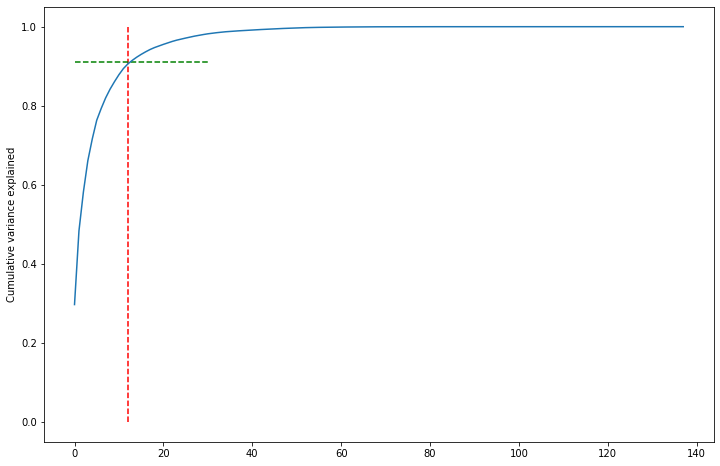

In [53]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=12, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Performing PCA with 12 componants as it is explaining about 91% of variation in the data

In [54]:
from sklearn.decomposition import IncrementalPCA

In [55]:
pca_final = IncrementalPCA(n_components=12)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 12)

In [56]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(12, 12)

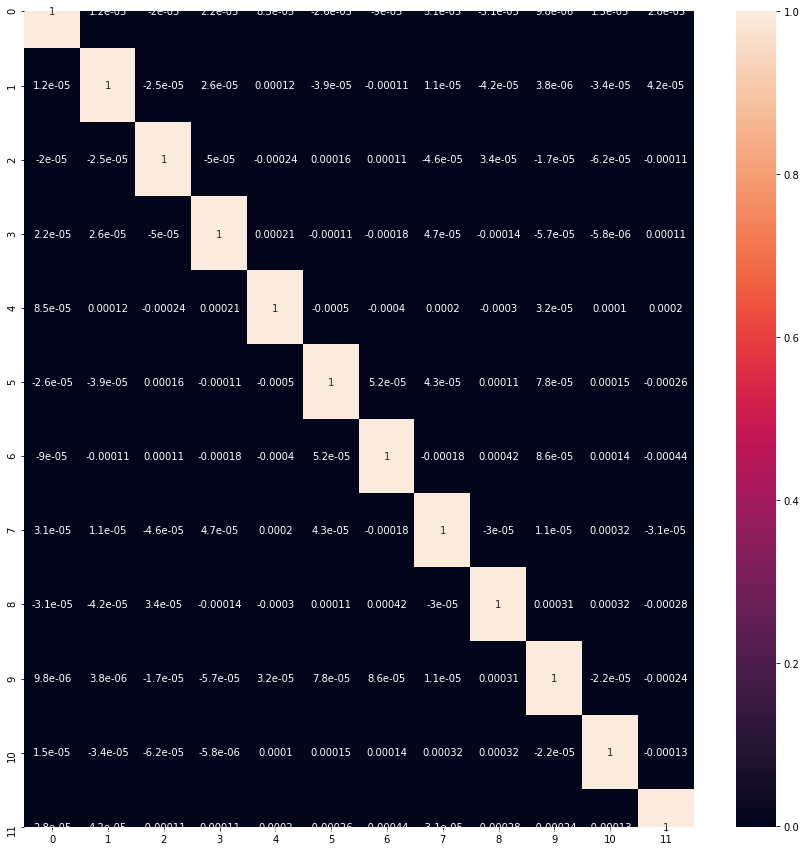

In [57]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [58]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 12)

### Modelling : Part 1: Building a Logistic Regression model using the Principal components

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_reg = LogisticRegression()
model_pca = log_reg.fit(df_train_pca, y_train)

###### Making predictions on test set

In [61]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [62]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.85'

### Observations:
- As can be seen our model performs well on the test data with a score of 85%

In [63]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
#pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [64]:
# create pipeline of steps in sequence to save us time running each step seperately
PCA_VARS = 12
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [65]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.6925714285714286

In [66]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check Precision
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print("precision: \t", round(precision, 2))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5643 2626]
 [ 167  565]]
Sensitivity: 	0.77
Specificity: 	0.68
precision: 	 0.18
AUC:    	 0.81


### Modelling : Part 2: Build a Random Forest model using the PCA components

#### Now we build a random forest model and see which one is better

In [67]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [68]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [69]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8797499293140029
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [70]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check Precision
precision = cm[1,1]/(cm[1,1]+cm[0,1])
print("precision: \t", round(precision, 2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8138  131]
 [ 410  322]]
Sensitivity: 	0.44
Specificity: 	0.98
precision: 	 0.71
AUC:    	 0.89


### Observation:
- Looks like we have a better ROC-AUC score of 88% with the Random Forest model compared to the AUC score of 81% with Logistic Regression

### 4. Finding best features: We'll build a Random Forest model and then tweak the hyperparameters
- We saw from before that the Random Forest performs better than the Logistic Regression model
- Also, as we did a PCA, we were unable to identify which attributes in the data can help us identify churners
- So we'll try to find those people now

In [72]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,yr_on_network,total_onnet_mou_6and7,total_offnet_mou_6and7,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,30.40,0.00,101.20,3.58,3.0,66.64,188.045,1
1,1069.180,1349.850,3171.480,52.29,325.91,16.23,33.49,31.64,23.74,12.59,...,0,0,57.74,19.38,18.74,0.00,2.0,112.52,1020.590,1
2,378.721,492.223,137.362,35.08,136.48,0.00,0.00,0.00,0.00,0.00,...,0,0,21.03,910.65,122.16,0.00,1.0,764.72,175.290,0
3,514.453,597.753,637.760,85.14,983.39,0.00,0.00,0.00,0.00,0.00,...,0,0,0.00,0.00,0.00,0.00,2.0,234.52,1654.610,0
4,74.350,193.897,366.966,33.58,205.89,0.00,0.00,0.00,0.00,0.00,...,0,1,40.45,51.86,0.00,0.00,2.0,99.62,174.770,0


In [73]:
y = df2.churn
X = df2.drop('churn', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
feat_labels = X_train.columns
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [76]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a basic model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [77]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [78]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9415714285714286 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [79]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [80]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
# predict
predictions = rfc.predict(X_test)

In [82]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8269
           1       0.00      0.00      0.00       732

    accuracy                           0.92      9001
   macro avg       0.46      0.50      0.48      9001
weighted avg       0.84      0.92      0.88      9001



#### Note:
- As you can see, we get a high test accuracy score of 92% using only 10 features. This is quite good and hence we can conclude that using Random Forest we can predict the churn-related features

In [86]:
# Print the name and gini importance of each feature

for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('arpu_6', 0.002241364326236327)
('arpu_7', 0.004833299127109693)
('arpu_8', 0.07157193814749194)
('onnet_mou_8', 0.011825712197681967)
('offnet_mou_8', 0.01600417754783275)
('roam_ic_mou_6', 0.00026486229847713254)
('roam_ic_mou_7', 0.003960034834211383)
('roam_ic_mou_8', 0.012940074162652498)
('roam_og_mou_6', 0.00015775344321480482)
('roam_og_mou_7', 0.0022610088359002684)
('roam_og_mou_8', 0.018735571556179664)
('loc_og_t2t_mou_6', 0.0006687702574450838)
('loc_og_t2t_mou_7', 0.0008871183501361991)
('loc_og_t2t_mou_8', 0.02118648617525924)
('loc_og_t2m_mou_6', 0.0006800369411091447)
('loc_og_t2m_mou_7', 0.0012131902378895378)
('loc_og_t2m_mou_8', 0.03342834497601742)
('loc_og_t2f_mou_6', 0.00040648374597673635)
('loc_og_t2f_mou_7', 0.0005666066755787195)
('loc_og_t2f_mou_8', 0.0060029316210480745)
('loc_og_t2c_mou_6', 0.00010977697323101288)
('loc_og_t2c_mou_7', 0.00011212340317458883)
('loc_og_t2c_mou_8', 1.8998466876313733e-05)
('loc_og_mou_6', 0.0008113868155526956)
('loc_og_mou_

### Observation:
- Looking at the above feature importance values, we can conclude that the top 15 features cumulatively account for a cumulative importance of 71%.
- These top 15 features, in order of importance are:
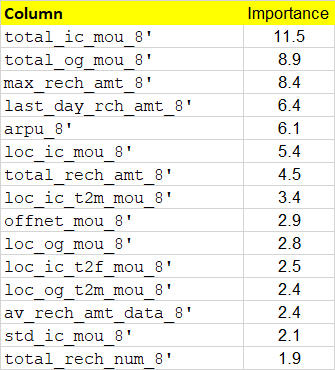


### 5. Devise retention Strategy: